In [1]:
import numpy as np

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
alpha0 = 1.0
betta0 = 2.0
alpha1 = 3.0
betta1 = -3.0


def q(x):
    return np.arcsin(1 / (1 + x ** 2))

def f(x):
    return np.sin(10 * x)

def forward_pass(h):
    x = 0
    
    A_list = []
    B_list = []
    
    A = - betta0 / h / (alpha0 - betta0 / h)
    B = 0.0
    
    A_list.append(A)
    B_list.append(B)
    
    x = h
    
    while x < 3.0:
        a = 1.0 / h ** 2
        b = -(2.0 / h ** 2 + q(x))
        c = 1.0 / h ** 2
        
        B = (f(x) - a * B) / (a * A + b)
        A = - c / (a * A + b)
        
        A_list.append(A)
        B_list.append(B)
        
        x = x + h
    
    return A_list, B_list

def backward_pass(A, B, h):
    a_n = -(betta1 / h)
    b_n = betta1 / h + alpha1
    
    A = A[::-1]
    B = B[::-1]
    
    y = (- B[0] * a_n) / (b_n + A[0] * a_n)
    
    y_list = []
    
    y_list.append(y)
    
    for i in range(0, len(A)):
        y = A[i] * y + B[i]
        y_list.append(y)

    return y_list[::-1]

In [3]:
h = 0.1

A, B = forward_pass(h)

Y = backward_pass(A, B, h)

prev0, prev1 = Y[0], Y[-1]

while True:
    h = h / 2
    A, B = forward_pass(h)

    Y = backward_pass(A, B, h)
    
    if (abs(Y[0] - prev0) + abs(Y[-1] - prev1)) <= 1e-2:
        break
    
    prev0, prev1 = Y[0], Y[-1]

print(h)

0.00625


In [4]:
print(len(Y))

481


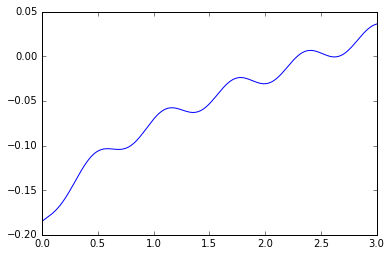

In [5]:
plt.plot(np.arange(0.0, 3.0 + h, h),  Y)